In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno # display missing data

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments
%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib Version : 3.4.3
Seaborn Version : 0.11.2
/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Coloumn Description

* **Suburb** - Suburb

* **Address** - Address

* **Rooms** - Number of rooms

* **Price** - Price in Australian dollars

**Method** - 
    
    S - property sold;
    SP - property sold prior;
    PI - property passed in;
    PN - sold prior not disclosed;
    SN - sold not disclosed;
    NB - no bid;
    VB - vendor bid;
    W - withdrawn prior to auction;
    SA - sold after auction;
    SS - sold after auction price not disclosed.
    N/A - price or highest bid not available.

**Type** -

    br - bedroom(s);
    h - house,cottage,villa, semi,terrace;
    u - unit, duplex;
    t - townhouse;
    dev site - development site;
    o res - other residential.

* **SellerG** - Real Estate Agent

* **Date** - Date sold

* **Distance** - Distance from CBD in Kilometres

* **Regionname** - General Region (West, North West, North, North east …etc)

* **Propertycount** - Number of properties that exist in the suburb.

* **Bedroom2** - Scraped # of Bedrooms (from different source)

* **Bathroom** - Number of Bathrooms

* **Car** - Number of carspots

* **Landsize** - Land Size in Metres

* **BuildingArea** - Building Size in Metres

* **YearBuilt** - Year the house was built

* **CouncilArea** - Governing council for the area

* **Lattitude** - Self explanitory

* **Longtitude** - Self explanitory

The objects of this notebook:

1. Defien Queistions
2. Understand Data
3. Pre-processing
4. Visualisation
5. Clustering
6. Linear Regression

# 1. Define Quetions

Clustering

Linear Regression

# 2. Understand Data

* **Number of rows/entries** - 34857 entries, 0 to 34856

* **Data columns** (total 21 columns):

*   **Numerical** (13 columns)
 *    float64 (12 columns) - 
    'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
    'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
    'Propertycount'

 *    int64 (1 column) - 'Rooms'

* **Nominal/Categorical** (8 columns)
 *     object (8 columns) - 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'
 

### Which features could higly be relative to Price?

Inference - Distance, Landsize, BuildingArea, YearBuilt, Rooms


In [ ]:
# show the current working directory
%pwd 

In [ ]:
# ???
%ls kaggle/working/

In [3]:
df = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df.shape # 34857 rows, 21 columns

(34857, 21)

In [ ]:
# df.dtypes
df.info()

In [ ]:
# Statistical Summary
df.describe()

In [ ]:
# Summary of object features
# df.describe(include = 'object')
df.describe(include = [np.object])

In [ ]:
len(set(df['Suburb']))

In [ ]:
# SELECT h FROM Type
df_type_h = df.loc[df['Type'] == 'h']
df_type_h.shape # 23980, 21

In [ ]:
# the number of values that each unique value has
df['Type'].value_counts()
df['Price'].value_counts().head(10)

There are not many empty values in **categorical features**, but there are a lot of empty values in **numerical features**.

In [ ]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

<AxesSubplot:>

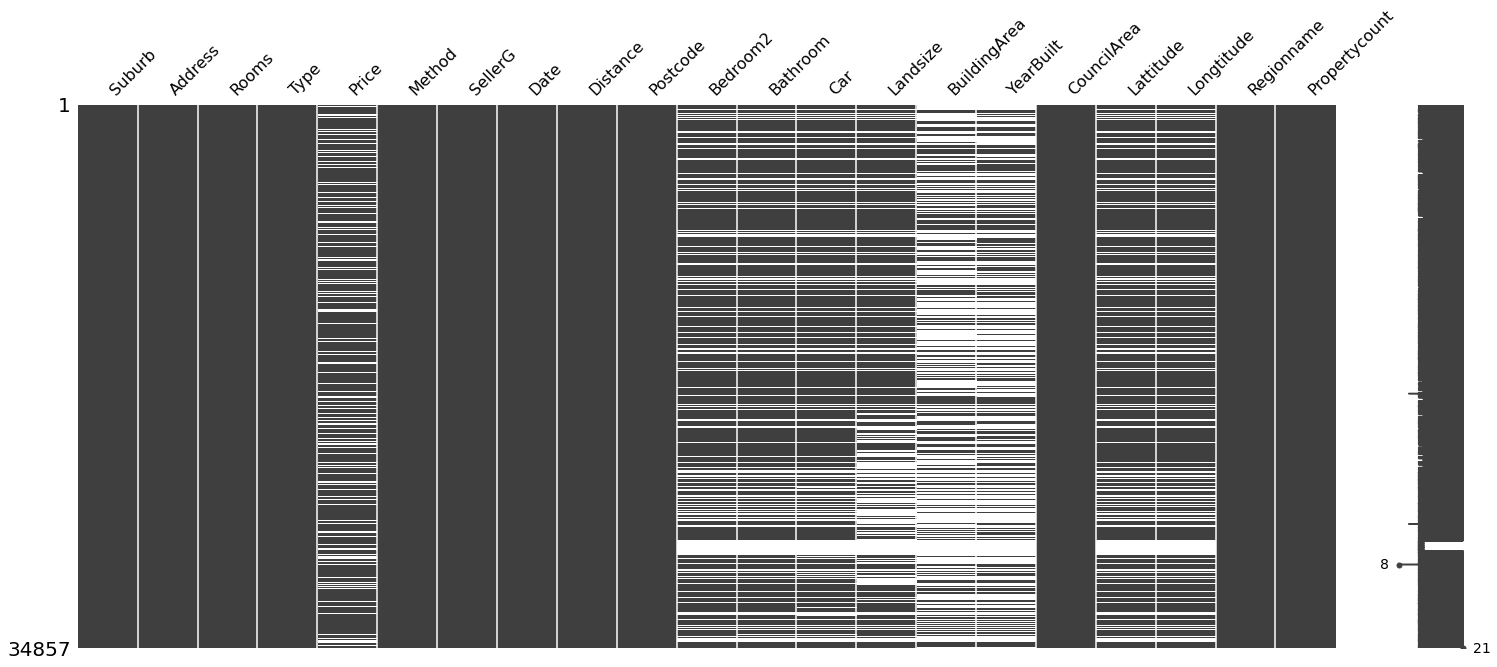

In [4]:
msno.matrix(df)

# 3. Pre-processing

* Drop unnecessary columns
* Remove/Fill missing values
* Imputation
* One hot encoding ?



Unncessary features? - Car, Address, SellerG, Postcode, Lattitude, Longitude, Propertycount

In [4]:
print(df.isnull().sum())
print('')
print(df.isnull().sum()/len(df))

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.218321
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000029
Postcode         0.000029
Bedroom2         0.235735
Bathroom         0.235993
Car              0.250394
Landsize         0.338813
BuildingArea     0.605761
YearBuilt        0.553863
CouncilArea      0.000086
Lattitude        0.228821
Longtitude       0.228821
Regionnam

In [5]:
# Address, SellerG, Postcode, Lattitude, Longtitud
# df.dropna(axis = 0, subset = )
df = df.drop(columns = ['Address', 'Car', 'SellerG', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], axis = 1)
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,Abbotsford,2,h,NaN,SS,3/09/2016,2.5,2.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,3,u,NaN,VB,4/02/2016,2.5,3.0,2.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [6]:
df = df.dropna(axis = 0, subset = ['Price', 'BuildingArea', 'YearBuilt'])
df.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Date               0
Distance           0
Bedroom2           0
Bathroom           0
Landsize        1221
BuildingArea       0
YearBuilt          0
CouncilArea        0
Regionname         0
dtype: int64

10249


<AxesSubplot:>

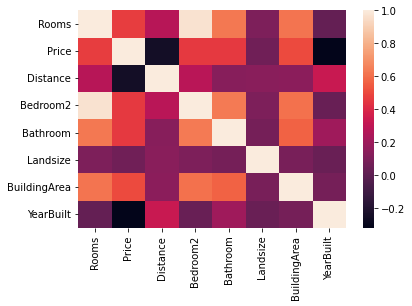

In [7]:
print(len(df))
df.corr()
sns.heatmap(df.corr())

In [7]:
df['Landsize'].fillna(round(df['Landsize'].median()), inplace = True)
# print(len(df.loc[df['Landsize'] == df['Landsize'].median()]))
# len(df.loc[df['Landsize'] == round(df['Landsize'].mean())])
print(len(df)) # 10249
df.isnull().sum()

10249


Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Date            0
Distance        0
Bedroom2        0
Bathroom        0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64

In [ ]:
# pd.set_option('display.max_rows', 50)

### Categorical Features

In [ ]:
# Columns that are object
cat_cols = df.select_dtypes(include = ['object'])
cat_cols.head()

### Numerical Features


In [ ]:
# Columns that are not object
num_cols = df.select_dtypes(exclude = ['object'])
num_cols.head()

# Visualisation

Suburb, YearBuilt, CouncilArea, Regionname

In [ ]:
for i in df:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

Suburb, YearBuilt, CouncilArea, and Regionname are not shown clearly

In [8]:
# Suburb, YearBuilt, CouncilArea, and Regionname
df['cat_suburb'] = df['Suburb'].astype('category').cat.codes
df['cat_yeaerbuilt'] = df['YearBuilt'].astype('category').cat.codes
df['cat_councilarea'] = df['CouncilArea'].astype('category').cat.codes
df['cat_regionname'] = df['Regionname'].astype('category').cat.codes
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,cat_suburb,cat_yeaerbuilt,cat_councilarea,cat_regionname
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,0,29,31,2
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,0,29,31,2
6,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,0,139,31,2
11,Abbotsford,3,h,1876000.0,S,7/05/2016,2.5,4.0,2.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,0,38,31,2
14,Abbotsford,2,h,1636000.0,S,8/10/2016,2.5,2.0,1.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,0,20,31,2


In [9]:
cat_df = df[['Rooms', 'Type', 'Price', 'Method', 'Date', 'Distance',
       'Bedroom2', 'Bathroom', 'Landsize', 'BuildingArea', 'cat_suburb', 'cat_yeaerbuilt',
       'cat_councilarea', 'cat_regionname']]
cat_df.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,cat_suburb,cat_yeaerbuilt,cat_councilarea,cat_regionname
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,0,29,31,2
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,0,29,31,2
6,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,120.0,142.0,0,139,31,2
11,3,h,1876000.0,S,7/05/2016,2.5,4.0,2.0,245.0,210.0,0,38,31,2
14,2,h,1636000.0,S,8/10/2016,2.5,2.0,1.0,256.0,107.0,0,20,31,2


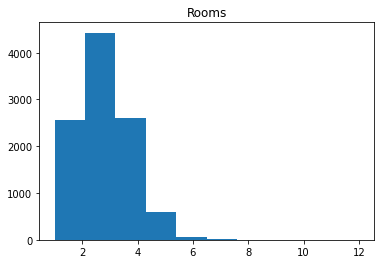

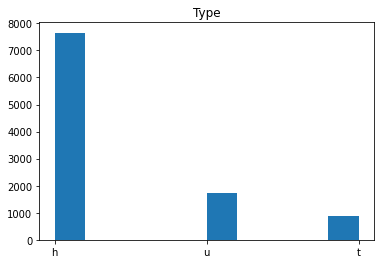

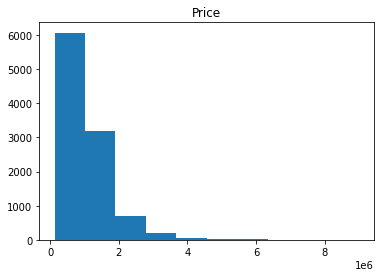

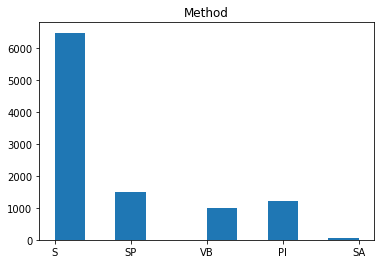

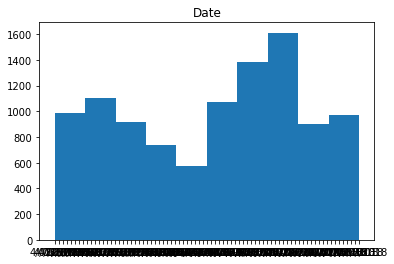

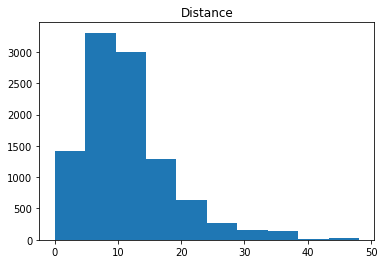

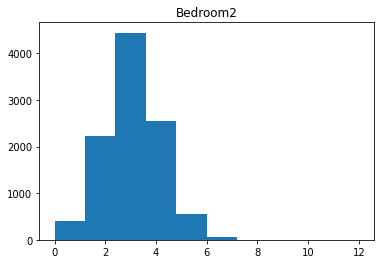

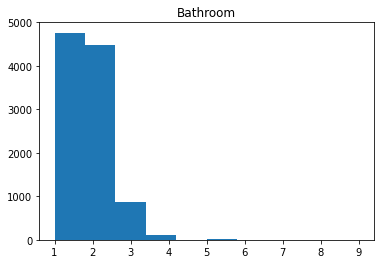

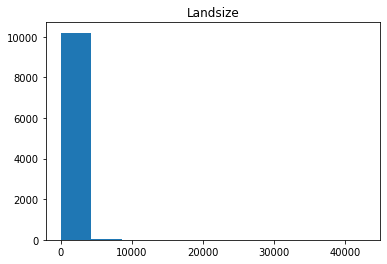

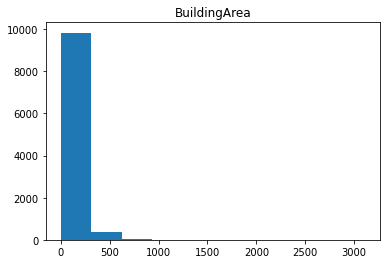

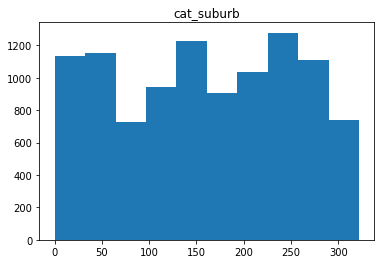

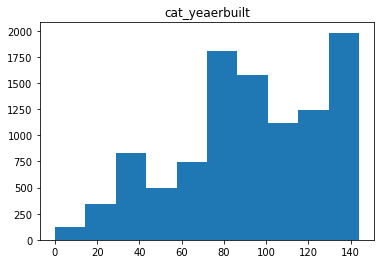

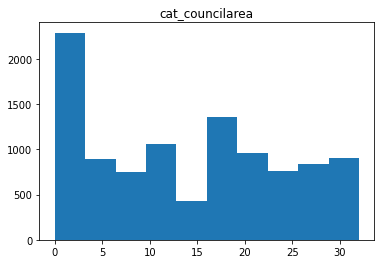

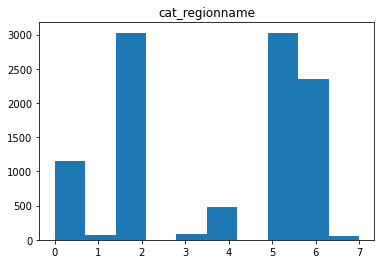

In [13]:
for i in cat_df:
    plt.hist(cat_df[i])
    plt.title(i)
    plt.show()

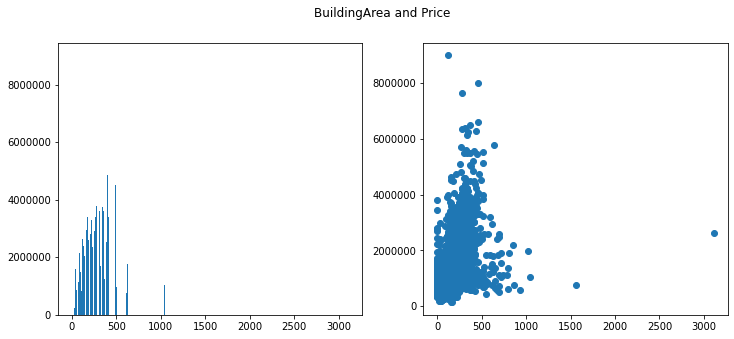

In [15]:
plt.figure(figsize = (12, 5)) # width, height
plt.subplot(121)
plt.bar(df['BuildingArea'], df['Price'])
# plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ticklabel_format(style = "plain")
plt.subplot(122)
plt.scatter(df['BuildingArea'], df['Price'])
plt.suptitle('BuildingArea and Price')
plt.ticklabel_format(style = "plain")
plt.show()

# df_converted = df

# for col_name in df_converted:
#     if(df_converted[col_name].dtype == 'object'):
#         df_converted[col_name] = df_converted[col_name].astype('category')
#         df_converted[col_name] = df_converted[col_name].cat.codes

In [ ]:
for i in cat_df:
    sns.barplot(cat_df[i].value_counts().index, cat_df[i].value_counts()).set_title(i)
    plt.show()

Set price range? for visualisation?

In [12]:
df_price = pd.DataFrame(df['Price'])

In [13]:
# df_price.apply(lambda x : for i in x if i < 5000)

def combine_price(x):
    if x <= 500000:
        return 500000
    elif x > 500000 and x <= 1000000:
        return 1000000
    elif x > 1000000 and x <= 1500000:
        return 1500000
    elif x > 1000000 and x <= 2000000:
        return 2000000
    elif x > 1000000 and x <= 2500000:
        return 2500000
    else:
        return 3000000

# Create df_price
df_price = pd.DataFrame(df['Price'])
    
# Create price range
df_price['price_range'] = df_price["Price"].apply(combine_price)
df_price['price_range'].value_counts()
df_price.head()

,Price,price_range
2,1035000.0,1500000
4,1465000.0,1500000
6,1600000.0,2000000
11,1876000.0,2000000
14,1636000.0,2000000


In [14]:
# Add price_range to df
df['price_range'] = df_price['price_range']
df.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,cat_suburb,cat_yeaerbuilt,cat_councilarea,cat_regionname,price_range
2,Abbotsford,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,0,29,31,2,1500000
4,Abbotsford,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,0,29,31,2,1500000
6,Abbotsford,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,0,139,31,2,2000000
11,Abbotsford,3,h,1876000.0,S,7/05/2016,2.5,4.0,2.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,0,38,31,2,2000000
14,Abbotsford,2,h,1636000.0,S,8/10/2016,2.5,2.0,1.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,0,20,31,2,2000000


In [15]:
# Take unique values (price_range) and the number of value of each unique value (counts) in df_price
price_data = {'price_range': df_price['price_range'].unique(), 'counts': df_price['price_range'].value_counts()}
# Create a DataFrame called df_rpice_range with price_data 
df_price_range = pd.DataFrame(data = price_data)
df_price_range

,price_range,counts
1000000,1500000,4834
1500000,2000000,2357
500000,1000000,1139
2000000,500000,1075
3000000,3000000,428
2500000,2500000,416


In [16]:
# Sort price_range and rename index
df_price_range.sort_values(by = 'price_range', inplace = True)
df_price_range.rename(index = {2000000:0, 500000:1, 1000000:2, 1500000:3, 2500000:4, 3000000:5}, inplace = True)
df_price_range

,price_range,counts
0,500000,1075
1,1000000,1139
2,1500000,4834
3,2000000,2357
4,2500000,416
5,3000000,428


I just wanted to plot a Pareto diagram... 

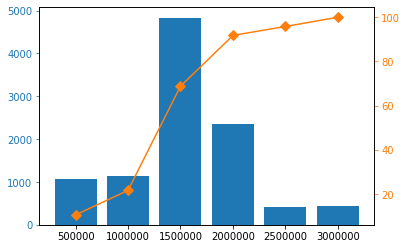

,price_range,counts,cumpercentage
0,500000,1075,10.488828
1,1000000,1139,21.602108
2,1500000,4834,68.767685
3,2000000,2357,91.765050
4,2500000,416,95.823983
5,3000000,428,100.000000


In [26]:
# https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python
df_price_range["cumpercentage"] = df_price_range["counts"].apply(lambda x: x/len(df["Price"])*100).cumsum()

fig, ax = plt.subplots()
ax.bar(df_price_range['price_range'].index, df_price_range["counts"], color = "C0")
x = np.arange(len(df_price_range))
xl = df_price_range['price_range']
ax.set_xticks(x)
ax.set_xticklabels(xl)
# ax.ticklabel_format(style = "plain")

ax2 = ax.twinx()
ax2.plot(df_price_range['price_range'].index, df_price_range["cumpercentage"], color = "C1", marker = "D", ms = 7)

ax.tick_params(axis = "y", colors = "C0")
ax2.tick_params(axis = "y", colors = "C1")
plt.show()

df_price_range

In [30]:
df['BuildingArea'].value_counts()

120.00    143
110.00    125
115.00    122
100.00    117
130.00    116
         ... 
427.00      1
186.75      1
127.80      1
106.40      1
530.00      1
Name: BuildingArea, Length: 612, dtype: int64

In [18]:
# Compare price_range and other categorical features
print(pd.pivot_table(df, index = 'price_range', columns = 'Type', values = 'cat_regionname', aggfunc = 'count'))
print()
# print(pd.pivot_table(df, index = 'price_range', columns = 'BuildingArea'))

Type              h      t      u
price_range                      
500000        352.0   76.0  711.0
1000000      3357.0  539.0  938.0
1500000      2095.0  195.0   67.0
2000000      1024.0   40.0   11.0
2500000       406.0    8.0    2.0
3000000       421.0    7.0    NaN



In [ ]:
# normal distribution?
# positive/right skwness - outliers lying on the right side

# sns.distplot(df['Price']) # distplot - displot or histplot
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', useOffset=False)
# plt.ticklabel_format(style='plain', axis='x',useOffset=False)

In [30]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris) # sklearn.utils.Bunch
len(iris.data) # 150
iris.data #nump.ndarray

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
from sklearn.cluster import KMeans
X = df[['Price', 'BuildingArea']]

kmeans = KMeans(n_clusters = 6, random_state = 0).fit(X)
labels = kmeans.labels_
# type(kmeans.labels_) #np.ndarray

In [56]:
a = pd.Series(data = labels)
a.value_counts()

5    3413
1    3212
2    2155
4    1053
0     376
3      40
dtype: int64

In [41]:
df_price['BuildArea'] = df['BuildingArea']
df_price['labels'] = pd.Series(data = labels)
df_price.head()

,Price,price_range,labels,BuildArea
2,1035000.0,1500000,2.0,79.0
4,1465000.0,1500000,2.0,150.0
6,1600000.0,2000000,2.0,142.0
11,1876000.0,2000000,1.0,210.0
14,1636000.0,2000000,1.0,107.0


In [45]:
df_price['labels'].value_counts()

5.0    1078
1.0    1056
2.0     738
4.0     363
0.0     130
3.0      17
Name: labels, dtype: int64

In [49]:
len(df_price['labels'].isna())

10249

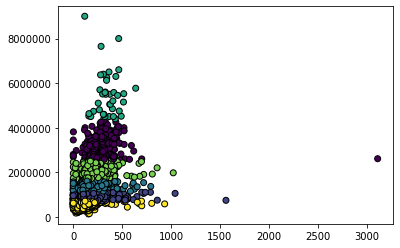

In [53]:
# ax, fig = plt.figure(2, figsize = (5, 3))
plt.scatter(X['BuildingArea'], X['Price'], c=labels.astype(float), edgecolor = 'k')
plt.ticklabel_format(style = 'plain')
plt.show()